In [1012]:
import copy
import io
import pickle
import re
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import pandas as pd
import stanfordnlp

import preprocessing

In [2]:
nlp = stanfordnlp.Pipeline(lang="tr")

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_tokenizer.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
---
Loading: mwt
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_mwt_expander.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
---
Loading: pos
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_tagger.pt', 'pretrain_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst.pretrain.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_lemmatizer.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
Building an attentional Seq2Seq model..

In [3]:
QUESTION_GROUPS_PATH = "../preprocessed_data/question_groups.pickle"
PASSAGES_PATH = "../preprocessed_data/passages.pickle"
WORD_VECTORS_PATH = "../cc.tr.300.vec"

In [4]:
with open(PASSAGES_PATH, "rb") as f:
    passages = pickle.load(f)

In [5]:
with open(QUESTION_GROUPS_PATH, "rb") as f:
    question_groups = pickle.load(f)

In [26]:
q_number = 10

In [27]:
sent = question_groups[q_number].questions[0].text.sentences[0]

In [28]:
question_groups[q_number].questions[0].text.text

'Ülkemizde bakır yatakları nerelerde bulunmaktadır?'

In [34]:
sent.dependencies

[(<Word index=5;text=bulunmaktadır;lemma=bulun;upos=VERB;xpos=Verb;feats=Aspect=Prog|Mood=Gen|Number=Sing|Person=3|Polarity=Pos|Polite=Form|Tense=Pres;governor=0;dependency_relation=root>,
  'obl',
  <Word index=1;text=Ülkemizde;lemma=ülke;upos=NOUN;xpos=Noun;feats=Case=Loc|Number=Sing|Number[psor]=Plur|Person=3|Person[psor]=1;governor=5;dependency_relation=obl>),
 (<Word index=3;text=yatakları;lemma=yatak;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Plur|Number[psor]=Sing|Person=3|Person[psor]=3;governor=5;dependency_relation=nsubj>,
  'nmod:poss',
  <Word index=2;text=bakır;lemma=bakır;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Sing|Person=3;governor=3;dependency_relation=nmod:poss>),
 (<Word index=5;text=bulunmaktadır;lemma=bulun;upos=VERB;xpos=Verb;feats=Aspect=Prog|Mood=Gen|Number=Sing|Person=3|Polarity=Pos|Polite=Form|Tense=Pres;governor=0;dependency_relation=root>,
  'nsubj',
  <Word index=3;text=yatakları;lemma=yatak;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Plur|Number[psor]=Sing|

In [10]:
len(question_groups)

1499

# Question Processing

In [157]:
q_words = {
    "hangisidir": [],
    "hangi tarih": [],
    "hangi yıl": [],
    "hangi dönem": [],
    "hangi çağ": [],
    "hangi bölge": [],
    "hangi il": [],
    "hangi şehir": [],
    "hangi ülke": [],
    "hangi": [],
    "ne denir": [],
    "ne kadar": [],
    "ne ad verilir": [],
    "ne zaman":[],
    "nedir": [],
    "nelerdir": [],
    "neden": [],
    "nere": [],
    "nasıl": [],
    "kaç yıl": [],
    "kaç": [],
    "kim": [],
    "ne": [],
    "denir": [],
    " mi": [],
    " mı": [],
    "other": []
}

for qg in question_groups:
    for q in qg.questions:
        raw = q.text.text.casefold()
        classified = False
        for q_word in q_words:
            if not classified and q_word != "other" and q_word in raw:
                q_words[q_word].append(q.idx)
                classified = True
                
        if not classified:
            q_words["other"].append(q.idx)
     

In [158]:
total = 0
for _list in q_words.values():
    total += len(_list)

In [159]:
total

1795

In [160]:
_lens = []
_classes = list(q_words.keys())
for _class in _classes:
    _lens.append(len(q_words[_class]))

([<matplotlib.axis.XTick at 0x135320c50>,
 <a list of 27 Text xticklabel objects>)

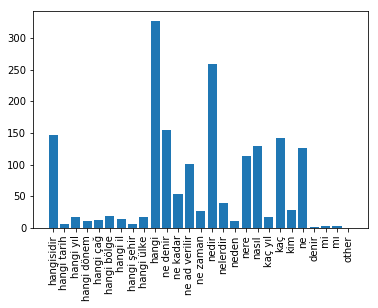

In [161]:
plt.bar(range(len(_classes)), _lens)
plt.xticks(range(len(_classes)), _classes, rotation=90)

In [162]:
question_dict = {}
for qg in question_groups:
    for q in qg.questions:
        question_dict[q.idx] = q, qg.answer, qg.related_par_id

In [787]:
for q_idx in q_words["neden"]:
    q, a, p_id = question_dict[q_idx]
    print(q.text.text)
    q.text.sentences[0].print_dependencies()
    #q.text.sentences[0].print_dependencies()
    #print(a.text)
    # related_passage = passages[p_id]
    # for sentence in related_passage.sentences:
     #   sentence.print_dependencies()
    

Laterit topraklar organik madde bakımından neden fakirdir?
('Laterit', '2', 'compound')
('topraklar', '7', 'nsubj')
('organik', '4', 'amod')
('madde', '5', 'nmod:poss')
('bakımından', '7', 'obl')
('neden', '7', 'obl')
('fakir', '0', 'root')
('dir', '7', 'cop')
('?', '7', 'punct')
Neden podzol topraklar besin maddeleri açısından fakirdir?
('Neden', '7', 'obl')
('podzol', '3', 'compound')
('topraklar', '7', 'nsubj')
('besin', '5', 'nmod:poss')
('maddeleri', '6', 'nmod:poss')
('açısından', '7', 'obl')
('fakir', '0', 'root')
('dir', '7', 'cop')
('?', '7', 'punct')
Kahverengi ve kestane renkli bozkır topraklarında kireç birikimi neden fazladır?
('Kahverengi', '6', 'nmod:poss')
('ve', '3', 'cc')
('kestane', '1', 'conj')
('renkli', '6', 'amod')
('bozkır', '6', 'nmod:poss')
('topraklarında', '10', 'obl')
('kireç', '8', 'nmod:poss')
('birikimi', '10', 'nsubj')
('neden', '10', 'obl')
('fazladır', '0', 'root')
('?', '10', 'punct')
Sularını deniz veya okyanuslara çeşitli nedenlerden dolayı (iklim,

In [788]:
# Question Types
#  Entity
#  Location
#  Human
#  Numeric

Entity = [
    "hangisidir",
    "nedir",
    "ne denir",
    "ne ad verilir",
    "nedir",
    "denir",
]

Location = [
    "hangi bölge",
    "hangi il",
    "hangi şehir",
    "hangi ülke",
    "nere",
]

Human = [
    "kim",
]

Numeric = [
    "ne kadar",
    "kaç",
    "hangi tarih",
    "hangi yıl",
    "hangi dönem",
    "hangi çağ",
]

Reason = [
    "nasıl",
]


proper_classes = {
    "Entity": Entity,
    "Location" : Location,
    "Human": Human,
    "Numeric": Numeric,
    "Reason": Reason,
}

def find_q_type(question):
    q = question.casefold()
    for class_name, _class in proper_classes.items():
        for key_word in _class:
            if key_word in q:
                return class_name
    
    
    if "ne" in q:
        return "Entity"
    elif " mi" in q or " mı" in q:
        return "YesNo"
    elif "hangi" in q:
        return "Entity"

    return "Other"

In [789]:
q_class = {}
for q, a, p_id in question_dict.values():
    q_class.setdefault(find_q_type(q.text.text), []).append((q, a, p_id))


In [790]:
for class_name, _class in q_class.items():
    print("{} : {}".format(class_name, len(_class)))

Numeric : 260
Human : 41
Entity : 1176
Location : 176
Reason : 126
YesNo : 16


In [791]:
def print_relations_root(sent):
    root_idx = -1
    for word in sent.words:
        if word.dependency_relation == "root":
            print("Root:", word.text)
            root_idx = int(word.index)

    for word in sent.words:
        if word.governor == root_idx:
            print(word.text, "relation", word.dependency_relation)

In [792]:
for class_name, _class in q_class.items():
    print("Type", class_name)
    for q, _, _ in _class:
        print(q.text.text)
        print_relations_root(q.text.sentences[0])

Type Numeric
ABD bağımsızlığını hangi yıl kazanmıştır?
Root: kazanmıştır
bağımsızlığını relation obj
yıl relation obl
? relation punct
Almanya'nın 1850 yılındaki kömür üretimi ne kadardır?
Root: kadar
dır relation cop
? relation punct
Almanya'da 1850 yılında ne kadar kömür üretilmiştir?
Root: üretilmiştir
Almanya'da relation obl
yılında relation obl
kömür relation obj
? relation punct
Almanya'da ormanlar, ülke topraklarının yaklaşık ne kadarını oluşturur?
Root: oluşturur
ormanlar relation nsubj
, relation punct
kadarını relation obj
? relation punct
Almanya'nın yaklaşık ne kadarlık kısmı ormanlardan oluşur?
Root: oluşur
kısmı relation nsubj
ormanlardan relation obl
? relation punct
Ormanlar Almanya topraklarının ne kadarlık kısmını oluşturur?
Root: oluşturur
Ormanlar relation nsubj
kısmını relation obj
? relation punct
Almanya ülke nüfusunun ne kadarlık kısmı şehirlerde yaşar?
Root: yaşar
kısmı relation nsubj
şehirlerde relation obl
? relation punct
Alman nüfusunun ne kadarı şehirlerde

bölgelerinde relation nmod
ortalaması relation nsubj
kaç relation amod
dir relation cop
? relation punct
Dünyadaki volkanların yaklaşık ne kadarı Ateş Çemberi alanında bulunur?
Root: bulunur
kadarı relation obl
alanında relation obl
? relation punct
Almanya'da sanayileşmenin ön hazırlıkları hangi dönemlerde gerçekleşmiştir?
Root: gerçekleşmiştir
hazırlıkları relation nsubj
dönemlerde relation obl
? relation punct
Dünya Miras Listesi’nde yer alan varlıklardan kaç tanesi tehlike altındadır?
Root: altında
tehlike relation nsubj
dır relation cop
? relation punct
Ülkemizin elektrik enerjisi üretiminin yüzde kaçı doğal gazdan elde edilmektedir?
Root: elde
üretiminin relation nmod
gazdan relation nmod
edilmekte relation compound:lvc
dir relation cop
? relation punct
Kaç yılından itibaren 5 yıllık kalkınma planları uygulanmaya başlamıştır?
Root: başlamıştır
yılından relation obl
uygulanmaya relation nmod
? relation punct
5 yıllık kalkınma planları hangi yıldan itibaren uygulanmaya başlanmıştır

kullanıldığı relation nsubj
bölgelerinde relation obl
verim relation nsubj
dır relation cop
? relation punct
Türkiye'nin ortalama yükseltisi kaç metredir?
Root: metre
yükseltisi relation nsubj
kaç relation amod
dir relation cop
? relation punct
Türkiye'deki zeytin ağacı varlığı 2014/15 sezonunda yaklaşık kaç milyondur?
Root: milyon
yaklaşık relation amod
kaç relation amod
dur relation cop
? relation punct
Dünyanın yaşı yaklaşık olarak kaçtır?
Root: kaçtır
yaşı relation nsubj
yaklaşık relation amod
? relation punct
Dünya kaç yaşındadır?
Root: yaşında
Dünya relation nsubj
kaç relation amod
dır relation cop
? relation punct
Dünya kaç yıl önce oluşmuştur?
Root: oluşmuştur
Dünya relation nsubj
yıl relation obl
? relation punct
Göller karaların ne kadarını kaplamaktadır?
Root: kaplamaktadır
Göller relation nsubj
kadarını relation obj
? relation punct
Koli basili bakterisinin yaşayabildiği optimum sıcaklık değeri kaçtır?
Root: kaç
değeri relation nsubj
tır relation cop
? relation punct
Dünyan

Enstitüsünde relation obl
göreve relation obj
kimdir relation aux:q
? relation punct
Kimyasal çözünmede önemli etkenler nelerdir?
Root: neler
çözünmede relation nmod
etkenler relation nsubj
dir relation cop
? relation punct
Türkiye'de ilk soya fasulyesi ekimine hangi yıllarda başlandı?
Root: başlandı
Türkiye'de relation obl
ekimine relation obl
yıllarda relation obl
? relation punct
Mısırın hangi özelliğinden dolayı ülkemizde ekim alanı genişlemiştir?
Root: genişlemiştir
özelliğinden relation obl
ülkemizde relation obl
alanı relation obj
? relation punct
Türk Seyyahin Cemiyeti kimin teşvikiyle kurulmuştur?
Root: kurulmuştur
Türk relation nsubj
teşvikiyle relation obl
? relation punct
Anadolu’da kimler demir, bakır, gümüş gibi madenleri işleyerek demir çapa, saban, tekerlek çemberi, bıçak, balta ve orak gibi aletler yapmıştır?
Root: yapmıştır
Anadolu’da relation obl
işleyerek relation nmod
çapa relation obl
aletler relation obj
? relation punct
Anadolu’da demir, bakır, gümüş gibi madenl

dir relation cop
? relation punct
Doğum ve ölüm oranlarının düşük olduğu gelişmiş ülkelere ait nüfus piramidinin adı nedir?
Root: adı
ülkelere relation nmod
piramidinin relation nmod:poss
nedir relation aux:q
? relation punct
Doğum ve ölüm oranlarının düşük olduğu gelişmiş ülkeler hangi tip nüfus piramidiyle temsil edilir?
Root: temsil
ülkeler relation nsubj
piramidiyle relation nmod
edilir relation compound:lvc
? relation punct
Orman üst sınırının belirlenmesindeki temel faktör nedir?
Root: faktör
belirlenesinde relation nmod
diki relation nmod:poss
temel relation amod
nedir relation aux:q
? relation punct
Yoğunluk, sıcaklık ve kalınlığı en az olan atmosfer katmanı nedir?
Root: katmanı
Yoğunluk relation nsubj
, relation punct
atmosfer relation nmod:poss
nedir relation aux:q
? relation punct
Ümit Burnu hangi kıtadadır?
Root: kıtada
Ümit relation nsubj
hangi relation amod
dır relation cop
? relation punct
Tropikal ve subtropikal bölgelerin bazı alanlarında ticari amaçla bir veya birkaç 

ir relation cop
? relation punct
Ülkemizdeki bölgesel kalkınma projelerinin ilki nedir?
Root: ilki
projelerinin relation nmod:poss
nedir relation aux:q
? relation punct
Çocuk aldırma (kürtaj) eyleminin yasaklanması, ölüm oranlarını azaltmak için halk sağlığını koruyucu yasal düzenlemelerin yapılması, evlilik yaşının düşürülmesi ve doğumların teşvik edilmesi amacıyla çok çocuklu ailelerin ödüllendirilmesi  ne amaçla gerçekleştirilen uygulamalardır?
Root: uygulamalar
yasaklanması relation nsubj
gerçekleştirilen relation acl
dır relation cop
? relation punct
Türkiye'nin bulunduğu alan hangi denizin altındaydı?
Root: altında
denizin relation nmod
ydı relation cop
? relation punct
İnsanların doğal çevreye olan ilk müdahalelerinden birisi Paleolitik Devir’de ne yoluyla olmuştur?
Root: yoluyla
birisi relation nsubj
Paleolitik relation amod
ne relation nmod:poss
olmuştur relation compound:lvc
? relation punct
Can kaybının yanı sıra tarım alanlarının zarar görmesine, toprak kaybının yaşanmasına

kral relation obl
? relation punct
Yükselim yağışa halk arasında ne ad verilir?
Root: ad
yağışa relation nmod
arasında relation amod
ne relation obj
verilir relation compound
? relation punct
Bulutlardan yeryüzüne sarmal hareketlerle dönen rüzgarlara ne denir?
Root: denir
rüzgarlara relation obl
ne relation obj
? relation punct
Uzaydaki dev kaya parçalarına ne ad verilir?
Root: ad
parçalarına relation nmod
ne relation obj
verilir relation compound
? relation punct
1989 yılında hazırlanan Master Plan ile tarım sanayi ulaştırma eğitim sağlık kırsal ve kentsel altyapı yatırımlarını da içine alan bölgesel kalkınma projesi nedir?
Root: ned
Master relation nsubj
projesi relation nsubj
ir relation cop
? relation punct
Ne 1989 yılında hazırlanan Master Plan ile tarım sanayi ulaştırma eğitim sağlık kırsal ve kentsel altyapı yatırımlarını da içine alan bölgesel kalkınma projesidir?
Root: provesi
içine relation amod
bölgesel relation amod
kalkınma relation nmod:poss
dir relation cop
? relation pu

? relation punct
Yer kabuğunu oluşturan bütün kayaçların kökeni nedir?
Root: kökeni
kayaçların relation nmod:poss
nedir relation aux:q
? relation punct
Toprağın değişik sosyoekonomik faaliyetler için değerlendirilmesine ne denir?
Root: denir
değerlendirilmesine relation nmod
ne relation obj
? relation punct
Suya doyan yüzeydeki toprağın anakayadan koparak yer değiştirmesi olayı nedir?
Root: olayı
koparak relation nmod
yer relation nmod:poss
değiştirmesi relation nmod:poss
nedir relation aux:q
? relation punct
Dünyadaki volkanların yaklaşık %75'i Pasifik Levhası'nın çevresinde yer aldığından bu alana ne ad verilir?
Root: ad
yer relation nmod
alana relation nmod
ne relation nmod
verilir relation compound
? relation punct
Lama, bizon, geyik, kanguru, bufalo, yabani at ve çeşitli kuşlar hangi biyomda yaşayan hayvan türleridir?
Root: tuvrleri
Lama relation nsubj
, relation punct
yaşayan relation acl
hayvan relation amod
dir relation cop
? relation punct
Yer kabuğunun derinliklerinde bulunan

değiştirme relation nsubj
sarsıntılar relation nsubj
dir relation cop
? relation punct
Nüfusun fazla ve sanayinin de ileri düzeyde olduğu bölgelerde özellikle yolcu taşımacılığında en çok tercih edilen önemli bir ulaşım sistemi nedir?
Root: sistemi
bölgelerde relation nmod
tercih relation nmod
oknem relation nmod
bir relation det
ulaşım relation nmod:poss
nedir relation aux:q
? relation punct
Büyükşehir teşkilatı kurulduğunda köyler ne statüsüne dönüştürülmüştür?
Root: dönüştürülmüştür
kurulduğunda relation acl
köyler relation nsubj
statüsüne relation obl
? relation punct
Yaz ve kış mevsimleri arasında oluşan sıcaklık ve basınç farklarına bağlı olarak oluşan rüzgarlara ne ad verilir?
Root: ad
rüzgarlara relation nmod
ne relation obj
verilir relation compound
? relation punct
Hangi uygarlık burçları bulmuştur?
Root: bulmuştur
uygarlık relation obl
burçları relation obj
? relation punct
Hazar Gölü'ne döküldüğü için kapalı havza özelliği gösteren nehrimizin adı nedir?
Root: adı
nehrimizin

1959'da relation nummod
Türkiye relation nsubj
ortak relation amod
? relation punct
Türkiye, 1. Jeolojik zamanda ilk olarak hangi kıvrımlardan etkilenmiştir ?
Root: Türkiye
, relation punct
1. relation punct
Türkiye’de tarım alanlarının yarıdan fazlasında ne yapılmaktadır?
Root: yapılmaktadır
Türkiye’de relation obl
fazlasında relation amod
ne relation obj
? relation punct
20. yüzyılın başında hem yük hem de yolcu taşımacılığında en önemli bir ulaşım sistemi hangisidir?
Root: hangisi
başında relation obl
yük relation punct
sistemi relation nsubj
dir relation cop
? relation punct
Güneş yılına dayalı takvimi hangi uygarlık bulmuştur?
Root: bulmuştur
takvimi relation nsubj
uygarlık relation obj
? relation punct
Özel olarak oluşturulmuş sistemler yoluyla Genel Ağ üzerinden verilen veya alınan siparişler ile mal ve hizmetleri alıp satma işlemine ne ad verilir?
Root: ad
işlemine relation nmod
ne relation obj
verilir relation compound
? relation punct
Genellikle ilkbahar ve yaz mevsimlerinde 

zaman relation obl
yaşamı relation obj
? relation punct
Sümerler, hangi alandaki verimli topraklarda yaşamış uygarlıklardandır?
Root: uygarlıklardan
Sümerler relation nsubj
, relation punct
topraklarda relation nmod
yaşamış relation amod
dır relation cop
? relation punct
Lüle taşı; genellikle hangi renklerdedir?
Root: taşı
Lüle relation nsubj
renklerde relation conj
Bal ve bal mumu üretmek amacıyla Türkiye'nin çoğu yerinde yapılmakta olan iş hangisidir?
Root: hangisi
iş relation nmod:poss
dir relation cop
? relation punct
volkanizma sonucu magmadan gelen ve yeryüzünde üst üste biriken malzemelerin özelliğine göre neler oluşur?
Root: oluşur
özelliğine relation obl
neler relation obj
? relation punct
Hallan Çemi (Batman), Demirköy ve Çayönü (Diyarbakır), Nevala Çöri (Şanlıurfa), Aşıklı Höyük (Aksaray), Çatalhöyük (Konya), Hattuşa (Çorum), Hacılar (Burdur), Cafer Höyük (Malatya) ve Yenikapı (İstanbul) hangi dönemdeki yerleşim alanlarından bazılarıdır?
Root: bazıları
Hallan relation nsubj


verilir relation compound
? relation punct
Hangi uygarlık yılı 354'e bölmüştür?
Root: bölmüştür
yılı relation nsubj
354'e relation nummod
? relation punct
Deniz ve okyanuslarda dalga çatlaması sonucu havaya karışan tuzlara ne ad verilir?
Root: ad
tuzlara relation nmod
ne relation obj
verilir relation compound
? relation punct
Genel bütçe ve vergi gelirlerine katkı bakımından %17,41 ile Türkiye sıralamasında ikinci sırada yer alan ilimiz hangisidir?
Root: hangisi
bakımından relation nmod
ilimiz relation nmod:poss
dir relation cop
? relation punct
Genel bütçe ve vergi gelirlerine katkı bakımından Türkiye’nin en yüksek ikinci ili hangisidir?
Root: hangisi
bütçe relation nsubj
bakımından relation obl
ili relation nsubj
dir relation cop
? relation punct
Hangi körfez ülkeleri sadece petrol ve doğal gaz ihraç ederek kalkınmaktadır?
Root: kalkınmaktadır
ülkeleri relation nsubj
ihraç relation obl
? relation punct
Fransa'da hangi tarım yöntemleri kullanılır?
Root: kullanılır
Fransa'da relation o

? relation punct
Anadolu'ya yazıyı hangi uygarlık getirmiştir?
Root: getirmiştir
Anadolu'ya relation obl
yazıyı relation obj
uygarlık relation obj
? relation punct
İnsanların banyo ve mutfak gibi zorunlu ihtiyaçlarını karşılayabileceği küçük ünitelerden oluşan minimal yaşam alanları nelerdir?
Root: neler
alanları relation nsubj
dir relation cop
? relation punct
Yeryüzünde depremlerin yoğunlaştığı üç ana kuşak nelerdir?
Root: neler
Yeryüzünde relation nmod
kuşak relation nsubj
dir relation cop
? relation punct
Ulusal ve uluslararası ticaret, borsa, bankacılık, sigortacılık, ulaşım gibi ekonomik faaliyetlerin bulunduğu şehirlere ne ad verilir?
Root: ad
Ulusal relation nsubj
şehirlere relation nmod
ne relation obj
verilir relation compound
? relation punct
Çekirdeğin yapısında ne bulunur?
Root: bulunur
yapısında relation obl
ne relation obj
? relation punct
Akarsuyun akım miktarının yıl içinde gösterdiği değişmelere ne denir?
Root: gösterdiği
içinde relation amod
denir relation conj
Osman

? relation punct
Evlerin arasında birkaç yüz metre hatta daha fazla mesafe bulunabilen yerleşmeye ne ad verilir?
Root: ad
yerleşmeye relation nmod
ne relation nmod
verilir relation compound
? relation punct
Binaların kırsal alanlardaki binalara göre daha sık, çok katlı ve sayıca fazla olduğu yerleşme nedir?
Root: yerleşme
binalara relation obl
olduğu relation obj
nedir relation aux:q
? relation punct
Deniz ve okyanus tabanlarında biriken kalın tortul tabakalara ne denir?
Root: denir
tabakalara relation obl
ne relation obj
? relation punct
Ülkemizde kuraklığın en belirgin yaşandığı bölge hangisidir?
Root: hangisi
Ülkemizde relation nmod
bölge relation nmod:poss
dir relation cop
? relation punct
Sıcaklık ve nemin yıl boyunca yüksek olduğu ekvatoral iklim bölgesinde yeşilliğini dört mevsim koruyan, uzun boylu ve geniş yapraklı ağaçlardan oluşan bitki örtüsü hangisidir?
Root: hangisi
örtüsü relation nsubj
dir relation cop
? relation punct
Kuzey Anadolu Dağları'nın Karadeniz'e bakan yamaçla

şehrimizde relation obl
imkanları relation nsubj
insanları relation obj
? relation punct
Taş kömürünün bulunup işlenmesi ile yeni iş alanları oluşan şehrimiz hangisidir?
Root: hangisi
işlenmesi relation nsubj
şehrimiz relation nsubj
dir relation cop
? relation punct
Geven, yavşan otu, çoban yastığı, gelincik, sığırkuyruğu, adaçayı, üzerlik, çayır üçgülü, kılıç otu ve çakır dikeni ülkemizde görülen neyin türleridir?
Root: türleri
Geven relation nsubj
neyin relation nmod:poss
dir relation cop
? relation punct
Ticarette asıl amaç nedir?
Root: amaç
Ticarette relation obl
asıl relation advmod
nedir relation aux:q
? relation punct
Ticari etkinliklerin temel amacı nedir?
Root: amacı
etkinliklerin relation nmod:poss
temel relation amod
nedir relation aux:q
? relation punct
Türkiye’nin petrol ithal ettiği ülkeler nelerdir?
Root: neler
ülkeler relation nsubj
dir relation cop
? relation punct
Akarsuyun sahip olduğu akımın artmasıyla taşıdığı su miktarının çevredeki arazilerde göllenmesine ne deni

nedir relation aux:q
? relation punct
Afyonkarahisar'da hakim rüzgar yönü nedir?
Root: yönü
Afyonkarahisar'da relation nmod
hakim relation nmod:poss
rüzgar relation nmod:poss
nedir relation aux:q
? relation punct
Ülkemizde çayın en çok üretildiği şehir hangisidir?
Root: hangisi
Ülkemizde relation obl
şehir relation nmod:poss
dir relation cop
? relation punct
Çayın en çok üretildiği şehir hangisidir?
Root: hangisi
şehir relation nmod:poss
dir relation cop
? relation punct
Yağmur suyu kayaçlarla etkileşime geçtiğinde neye sebep olur?
Root: sebep
geçtiğinde relation acl
neye relation nmod
olur relation compound:lvc
? relation punct
Kayaçlar ve yağmur suyu etkileştiğinde neye sebep olurlar?
Root: sebep
etkileştiğinde relation acl
neye relation nmod
olurlar relation compound:lvc
? relation punct
Türkiye hayvancılığında et ve süt üretiminin büyük bölümü hangi tip hayvancılıktan sağlanmaktadır?
Root: sağlanmaktadır
hayvancılığında relation obl
bölümü relation nsubj
hayvancılıktan relation obl

? relation punct
Avrupa'daki en yüksek zirve hangi ülkededir?
Root: ülkede
zirve relation nsubj
hangi relation amod
dir relation cop
? relation punct
Podzol topraklar nerede oluşmuştur?
Root: oluşmuştur
topraklar relation nsubj
nerede relation obl
? relation punct
Okyanuslar, denizler, göller ve akarsular beslenme alanlarıyla birlikte hangi bölgeleri oluşturur.?
Root: oluşturur
Okyanuslar relation nsubj
, relation punct
alanlarıyla relation obl
bölgeleri relation obj
. relation punct
Buhar gücüyle çalışan lokomotifler, yük taşıma aracı olarak ilk kez nerede kullanılmıştır?
Root: kullanılmıştır
lokomotifler relation nsubj
, relation punct
aracı relation obl
kez relation obl
nerede relation obl
? relation punct
Avrupa kıtası, hangi ülkeden gelen doğal gaza bağımlı haldedir?
Root: halde
kıtası relation nsubj
, relation punct
gelen relation acl
doğal relation amod
bag relation nmod
dir relation cop
? relation punct
Yıl boyunca sıcaklıkların yüksek olduğu bölge neresidir?
Root: neresi
Yıl r

? relation punct
Ülkemizde üretilen soya fasulyesinin yarısından fazlası hangi ilimizde gerçekleşir?
Root: gerçekleşir
yarısından relation amod
fazlası relation nsubj
ilimizde relation obl
? relation punct
Depremler çoğunlukla nerede meydana gelmektedir?
Root: meydana
Depremler relation nsubj
çoğunlukla relation nmod
nerede relation nmod
gelmekte relation compound
dir relation cop
? relation punct
Sanayi faaliyetlerinin yoğun olarak yapıldığı alanlar hangi bölgeleri oluşturur?
Root: oluşturur
alan relation nsubj
bölgeleri relation obj
? relation punct
Hangi topraklar kışın düşük sıcaklıktan dolayı donar, yazın da çözünerek bataklık halini alır?
Root: donar
topraklar relation nsubj
sıcaklıktan relation obl
alır relation conj
Kahverengi ve kestane renkli bozkır toprakları nerede görülür?
Root: görülür
toprakları relation nsubj
nerede relation obl
? relation punct
Afrika kıtasında demir yolu ağının en sık olduğu yer hangi ülkedir?
Root: ülke
yer relation nsubj
hangi relation amod
dir rela

Türkiye'de relation obl
Eğirdir relation nsubj
olmasından relation nmod
kerevit relation nsubj
, relation punct
avlanabilme relation nsubj
? relation punct
Kuzey ve Güney Amerika kıyılarının keşfedilmesi ile Atlas Okyanusu’nun önemini nasıl değişmiştir?
Root: değişmiştir
keşfedilmesi relation nmod
önemini relation obj
nasıl relation advmod
? relation punct
Organik tarım yaygınlaştıkça tedavisi çok pahalı olan hastalıklara yakalanma oranları nasıl değişecek?
Root: değişecek
hastalıklara relation obl
oran relation nsubj
nasıl relation advmod
? relation punct
Tüketim artışı üretimi nasıl etkiler?
Root: etkiler
üretimi relation nsubj
nasıl relation advmod
? relation punct
Türkiye'nin coğrafi konumu, rüzgâr ve güneş enerjisi potansiyelini nasıl etkilemiştir?
Root: etkilemiştir
konumu relation nsubj
potansiyelini relation obj
nasıl relation advmod
? relation punct
Mısırın son yıllarda artan üretim miktarına paralel olarak yem, yağ ve tatlandırıcı sektörü ile biyoyakıt- biyoetanol üretimindek

? relation punct
Type YesNo
Tarım alanlarının miras yoluyla küçülüp çok parçalı bir yapı arz etmesi, elverişsiz iklim koşulları gibi etkenler hangi sektörde verimliliği düşürür?
Root: düşürür
arz relation nsubj
, relation punct
koşulları relation obl
etkenler relation nsubj
sektörde relation obl
verimliliği relation obj
? relation punct
Gökçeada Cittaslow ünvanını almış mıdır?
Root: almış
ünvanını relation obj
mıdır relation aux:q
? relation punct
Arpa buğdaya göre soğuğa ve kuraklığa daha az mı dayanıklı?
Root: dayanık
buğdaya relation nmod
az relation advmod
lı relation case
? relation punct
Kültürel özellikler de ekonomik faaliyetlerden etkilenir mi?
Root: etkilenir
özellikler relation nsubj
faaliyetlerden relation obl
mi relation aux:q
? relation punct
Ülkemizde mısırın en çok üretildiği yer hangi kıyıdır?
Root: kıyı
Ülkemizde relation nmod
yer relation nsubj
hangi relation amod
dır relation cop
? relation punct
Ükemizde tarımı destekleyen kuruluş sayısı az mıdır?
Root: az
sayısı r

In [547]:
def find_q_focus(question):
    # Question as stanford nlp doc

    focus = []
    root_idx = -1
    for word in question.sentences[0].words:
        if word.dependency_relation == "root":
            root_idx = int(word.index)
            focus.append(word.lemma)
            
    def check_word(word):
        return word.dependency_relation != "cop" and word.dependency_relation != "punct"

    for word in question.sentences[0].words:
        if word.governor == root_idx and check_word(word):
            focus.append(word.lemma)
    return focus

In [549]:
for class_name, _class in q_class.items():
    print("Type", class_name)
    for q, _, _ in _class:
        print(q.text.text)
        print(find_q_focus(q.text))
        #print(dir(q.text.sentences[0].words[0]))

Type Numeric
ABD bağımsızlığını hangi yıl kazanmıştır?
['kazan', 'bağımsızlık', 'yıl']
Almanya'nın 1850 yılındaki kömür üretimi ne kadardır?
['kadar']
Almanya'da 1850 yılında ne kadar kömür üretilmiştir?
['üre', 'Almanya', 'yıl', 'kömür']
Almanya'da ormanlar, ülke topraklarının yaklaşık ne kadarını oluşturur?
['oluş', 'orman', 'kadar']
Almanya'nın yaklaşık ne kadarlık kısmı ormanlardan oluşur?
['oluş', 'kısım', 'orman']
Ormanlar Almanya topraklarının ne kadarlık kısmını oluşturur?
['oluş', 'orman', 'kısım']
Almanya ülke nüfusunun ne kadarlık kısmı şehirlerde yaşar?
['yaşa', 'kısım', 'şehir']
Alman nüfusunun ne kadarı şehirlerde yaşar?
['yaşa', 'kadarı', 'şehir']
2018’de Dünya Miras Listesi’nde kaç varlık yer almıştır?
['al', '2018ı', 'liste', 'yer']
Zimbabve kaç adet milli parka sahiptir?
['sahip', 'zimbabve', 'adet', 'park']
2015 yılı Birleşmiş Milletler verilerine göre dünyadaki ortalama yaşam süresi kaç yıldır?
['yıl', 'süre', 'kaç']
2015 yılı Birleşmiş Milletler verilerine göre dün

['ned', 'bölge', 'kaynak']
En fazla kullanım oranına sahip yenilenebilir enerji türü nedir?
['tür', 'fazla', 'oran', 'sahip', 'enerji', 'nedir']
1 Ocak 1994’te ABD, Kanada ve Meksika tarafından yapılan antlaşma nedir?
['antlaşma', '1', 'yap', 'nedir']
ABD, Kanada ve Meksika tarafından yapılan 1 Ocak 1994 tarihli antlaşma nedir?
['antlaşma', 'Abd', '1', 'tarih', 'nedir']
Haritalarda kullanılan işaret ve renklerin ne anlama geldiğini gösteren bölüme ne denir?
['de', 'bölüm', 'ne']
Hangi bölüm haritalarda kullanılan işaretlerin anlamını gösterir?
['göster', 'bölüm', 'anlam']
Mağara tavanlarından damlayan suların içerisindeki malzemenin tavanda birikmesiyle oluşan şekil nedir ?
['ned']
Yağışın az, su kaynaklarının yetersiz, kurak mevsimlerin uzun, toprağın ince ve gevşek, bitki örtüsünün seyrek olduğu alanlarda sıkça görülen çevre sorunu nedir?
['sorun', 'az', 'gör', 'çevre', 'nedir']
Buğdayın öğütülmesi sonucu ortaya çıkan kepek, diğer yan ürünler ve düşük vasıflı buğdaylar ne olarak kull

Hangisi,  genellikle akarsu vadilerinde, akarsuyun üzerinde aktığı tabanın iki yanında ve belli bir yükseltide kalmış düzlüklere verilen isimdir ?
['isim', 'hangi', 'ver']
Byolojik çeşitlilik nedir?
['ned', 'çeşitlilik']
Kanyon, obruk, traverten ve mağara gibi yeryüzü şekillerinin oluşmasında en etkili olan kayaç türünün isme nedir ?
['is', 'Kanyon', 'türü', 'nedir']
Ülkemizde bulunan kanyon, obruk, traverten ve mağara gibi yeryüzü şekillerinin oluşmasında en etkili olan kayaç türü hangisidir?
['hangi', 'türü']
Bilim, sanat ve eğitim gibi çeşitli kültürel faaliyetlerin ön planda olduğu şehirlere ne ad verilir?
['ad', 'bilim', 'şehir', 'ne', 'ver']
J. Richard Gott hangi üniversitede astrofizikçidir?
['j']
Maden yatağında bulunan ve henüz işlenmemiş toplam maden miktarına ne denir?
['de', 'bulun', 'miktar', 'ne']
İlk yerli Türk otomobilinin adı nedir?
['ad', 'otomobili', 'nedir']
1957'de Roma Antlaşması'yla hangi topluluk kurulmuştur?
['kur', '1957', 'Roma', 'topluluk']
İzmir İktisat Kon

In [550]:
def find_type_focus_dep(question):
    q_type = find_q_type(question)
    parsed_q = nlp(question)
    q_focus = find_q_focus(parsed_q)
    q_dep = parsed_q.sentences[0].dependencies
    
    return q_type, q_focus, parsed_q

In [551]:
type_, focus, parsed_q = find_type_focus_dep("Müslüman coğrafyacılardan İbni Haldun hangi çağda etkili olmuştur?")
print(type_)
print(focus)
print(parsed_q)

Numeric
['ol', 'coğrafyacı', 'ibin', 'çağ', 'etkili']


In [1426]:
class_type = "Numeric"

In [1427]:
answers = {}
for q, a, p_idx in q_class[class_type]:
    answers.setdefault(a.text, []).append((q, a, p_idx))

In [1428]:
len(answers), len(q_class[class_type])

(168, 260)

In [1429]:
qq, a, p_idx = q_class[class_type][10]# q_class["Reason"][55]
p = passages[p_idx]

In [1430]:
q_type, q_focus, parsed_q = find_type_focus_dep(qq.text.text)

In [1431]:
q_type, q_focus, parsed_q

('Numeric',
 ['yıl', 'süre', 'kaç'],
 <stanfordnlp.pipeline.doc.Document at 0x13573cc18>)

In [1432]:
p.text

"Ortalama yaşam süresi, ülkelerin sağlıktaki seviyeleri ile doğrudan ilişkili ve gelişmişliğin göstergelerinden biridir. Dünyadaki ortalama yaşam süresi 2015 yılı Birleşmiş Milletler verilerine göre 72 yıldır. Gelişmiş bir ülke olan Japonya'da ortalama yaşam süresinin 84 yıl, az gelişmiş bir ülke olan Nijer'de ise 59 yıl olduğu görülmektedir."

In [1433]:
qq.text.text

'2015 yılı Birleşmiş Milletler verilerine göre dünyadaki ortalama yaşam süresi kaç yıldır?'

In [1434]:
a.text

'72 yıl'

In [1435]:
sentences = p.sentences

In [1436]:
def construct_bigrams(words):
    word_list = [word.text for word in words]
    word_list.insert(0, "ROOT")
    return [
        (word_list[int(word.index)], word.dependency_relation, word_list[word.governor])
        for word in words
    ]

In [1437]:
def s(a, b):
    if a == b:
        return 1
    else:
        return 0

In [1438]:
theta = 2

In [1439]:
def q(a, b):
    if a == b:
        return theta
    else:
        return 1

In [1440]:
def sim(bigram1, bigram2):
    dep_1, type_1, head_1 = bigram1
    dep_2, type_2, head_2 = bigram2
    
    return (s(dep_1, dep_2) + s(head_1, head_2)) * q(type_1, type_2)

In [1441]:
def calculate_tree_distance(sentence, parsed_question):
    sent_bigrams = construct_bigrams(sentence.words)
    quest_bigrams = construct_bigrams(parsed_question.sentences[0].words)

    score = 0
    for sent_bigram in sent_bigrams:
        for quest_bigram in quest_bigrams:
            score += sim(sent_bigram, quest_bigram)

    return score / (len(sent_bigrams) + len(quest_bigrams))

In [1442]:
def calculate_focus_score(sentence, question_focus):
    score = 0
    sentence_lemmas = [word.lemma for word in sentence.words]
    for lemma in question_focus:
        if lemma in sentence_lemmas:
            score += 1

    return score / len(question_focus) if question_focus else 0

In [1443]:
def calculate_overall_scores(tree_dists, focus_scores):
    return [0.8 * tree_dist + 0.2 * focus_score for tree_dist, focus_score in zip(tree_dists, focus_scores)]

In [1444]:
tree_dists = [calculate_tree_distance(sentence, qq.text) for sentence in sentences]
focus_scores = [calculate_focus_score(sentence, q_focus) for sentence in sentences]

In [1445]:
scores = calculate_overall_scores(tree_dists, focus_scores)

In [1446]:
max_idx = scores.index(max(scores))

In [1447]:
sentences[max_idx].print_dependencies()
for word in sentences[max_idx].words:
    print(word.index, word.text, word.upos, word.governor, word.dependency_relation, word.feats)

('dünyada', '5', 'nmod')
('ki', '1', 'case')
('ortalama', '4', 'amod')
('yaşam', '5', 'nmod:poss')
('süresi', '13', 'nsubj')
('2015', '7', 'nmod:poss')
('yılı', '8', 'obl')
('Birleşmiş', '10', 'acl')
('Milletler', '10', 'nmod:poss')
('verilerine', '13', 'nmod')
('göre', '10', 'case')
('72', '13', 'nummod')
('yıl', '0', 'root')
('dır', '13', 'cop')
('.', '13', 'punct')
1 dünyada NOUN 5 nmod Case=Loc|Number=Sing|Person=3
2 ki ADP 1 case _
3 ortalama ADJ 4 amod _
4 yaşam NOUN 5 nmod:poss Case=Nom|Number=Sing|Person=3
5 süresi NOUN 13 nsubj Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3
6 2015 NOUN 7 nmod:poss Case=Nom|Number=Sing|Person=3
7 yılı NOUN 8 obl Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3
8 Birleşmiş VERB 10 acl Aspect=Perf|Evident=Nfh|Mood=Ind|Polarity=Pos|Tense=Past|VerbForm=Part
9 Milletler NOUN 10 nmod:poss Case=Nom|Number=Plur|Person=3
10 verilerine NOUN 13 nmod Case=Dat|Number=Plur|Number[psor]=Sing|Person=3|Person[psor]=3
11 göre ADP 10

In [1448]:
qq.text.sentences[0].print_dependencies()
for word in qq.text.sentences[0].words:
    print(word.text, word.pos, word.feats)

('2015', '3', 'obl')
('yılı', '1', 'compound')
('Birleşmiş', '4', 'acl')
('Milletler', '7', 'nmod')
('verilerine', '4', 'compound')
('göre', '4', 'case')
('dünyada', '11', 'nmod')
('ki', '7', 'case')
('ortalama', '11', 'amod')
('yaşam', '11', 'nmod:poss')
('süresi', '13', 'nsubj')
('kaç', '13', 'amod')
('yıl', '0', 'root')
('dır', '13', 'cop')
('?', '13', 'punct')
2015 Noun Case=Nom|Number=Sing|Person=3
yılı Noun Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3
Birleşmiş Verb Aspect=Perf|Evident=Nfh|Mood=Ind|Polarity=Pos|Tense=Past|VerbForm=Part
Milletler Noun Case=Nom|Number=Plur|Person=3
verilerine Noun Case=Dat|Number=Plur|Number[psor]=Sing|Person=3|Person[psor]=3
göre PCDat _
dünyada Noun Case=Loc|Number=Sing|Person=3
ki Rel _
ortalama Adj _
yaşam Noun Case=Nom|Number=Sing|Person=3
süresi Noun Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3
kaç Adj _
yıl Noun Case=Nom|Number=Sing|Person=3
dır Zero Aspect=Perf|Mood=Gen|Number=Sing|Person=3|Tense=Pres
? P

In [1449]:
def find_root(sentence):
    for word in sentence.words:
        if word.governor == 0:
            return int(word.index)
    return 0


def find_subject(sentence):
    root_idx = find_root(sentence)
    subjects = []
    if root_idx > 0:
        for word in sentence.words:
            if word.governor == root_idx and word.dependency_relation == "nsubj":
                subjects.append(int(word.index))
                
    return subjects


def find_related_words(sentence, idx):
    idx_ = []

    while idx_ != idx:
        idx_ = copy.deepcopy(idx)
        for word in sentence.words:
            if word.governor in idx and int(word.index) not in idx:
                idx.append(int(word.index))
                
    return idx
            
    

In [1450]:
def construct_answer_from_idx(sentence, idx):
    return " ".join([word.text for word in sentence.words if int(word.index) in idx])

In [1471]:
def check_word_in_question(word, question):
    return word.text.casefold() in question.casefold() # \
           # or word.lemma.casefold() in question.casefold()

In [1472]:
def construct_sentence(sentence, question):
    return " ".join([word.text for word in sentence.words if not check_word_in_question(word, question) and word.upos != "PUNCT"])

In [1473]:
def entity_answer_extractor(sentence, parsed_question):
    subject_idx = find_subject(sentence)
    related_idx = find_related_words(sentence, subject_idx)
    
    if related_idx:
        return construct_answer_from_idx(sentence, related_idx)
    else:
        return construct_sentence(sentence, parsed_question.text)

In [1474]:
entity_answer_extractor(sentences[max_idx], qq.text)

'dünyada ki ortalama yaşam süresi'

In [1475]:
a.text

'72 yıl'

In [1476]:
def contains_eachother(word1, word2):
    return word1.text in word2.text or word2.text in word1.text \
           or word1.lemma in word2.lemma or word2.lemma in word1.lemma

In [1477]:
def find_left_child(sentence, idx):
    for word in sentence.words:
        if word.governor == idx and word.dependency_relation == "obl":
            return int(word.index)
        
    return -1

In [1478]:
def find_relation(sentence, idx, relation):
    related_idx = []
    for word in sentence.words:
        if word.governor == idx and word.dependency_relation == relation:
            related_idx.append(int(word.index))
            
    return related_idx

In [1479]:
def location_answer_extractor(sentence, parsed_question):
    question_sent = parsed_question.sentences[0]
    sent_root_idx = find_root(sentence)
    quest_root_idx = find_root(question_sent)
    root = sentence.words[sent_root_idx - 1]
    
    if contains_eachother(sentence.words[sent_root_idx - 1], question_sent.words[quest_root_idx - 1]):
        if root.upos == "VERB":
            idx = []
            left_child = find_left_child(sentence, sent_root_idx)
            if left_child > 0:
                idx.append(left_child)
                idx = find_related_words(sentence, idx)
            
            amods = find_relation(sentence, sent_root_idx, "amod")
            if amods:
                for i in amods:
                    if i not in idx:
                        idx.append(i)
                
                idx = find_related_words(sentence, idx)
            
            if idx:
                return construct_answer_from_idx(sentence, idx)

    print(sentence.words)
    return construct_sentence(sentence, parsed_question.text)
                

In [1480]:
location_answer_extractor(sentences[max_idx], qq.text)

[<Word index=1;text=dünyada;lemma=dünya;upos=NOUN;xpos=Noun;feats=Case=Loc|Number=Sing|Person=3;governor=5;dependency_relation=nmod>, <Word index=2;text=ki;lemma=ki;upos=ADP;xpos=Rel;feats=_;governor=1;dependency_relation=case>, <Word index=3;text=ortalama;lemma=ortalama;upos=ADJ;xpos=Adj;feats=_;governor=4;dependency_relation=amod>, <Word index=4;text=yaşam;lemma=yaşam;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Sing|Person=3;governor=5;dependency_relation=nmod:poss>, <Word index=5;text=süresi;lemma=süre;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3;governor=13;dependency_relation=nsubj>, <Word index=6;text=2015;lemma=2015;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Sing|Person=3;governor=7;dependency_relation=nmod:poss>, <Word index=7;text=yılı;lemma=yıl;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3;governor=8;dependency_relation=obl>, <Word index=8;text=Birleşmiş;lemma=birleş;upos=VERB;xpos=Verb;feats=

'72'

In [1483]:
def human_answer_extractor(sentence, parsed_question):
    # TODO: Improve this extractor
    return entity_answer_extractor(sentence, parsed_question.text)
        
        

In [1484]:
def numeric_answer_extractor(sentence, parsed_question):
    # TODO: Improve this extractor
    return construct_sentence(sentence, parsed_question.text)

In [1485]:
def reason_answer_extractor(sentence, parsed_question):
    # TODO: Improve this extractor
    return construct_sentence(sentence, parsed_question.text)

In [1487]:
def yes_no_answer_extractor(sentence, parsed_question):
    # TODO: Improve this extractor
    return construct_sentence(sentence, parsed_question.text)

In [1488]:
def other_answer_extractor(sentence, parsed_question):
    return construct_sentence(sentence, parsed_question.text)

In [1489]:
answer_extractors = {
    "Entity": entity_answer_extractor,
    "Location" : location_answer_extractor,
    "Human": human_answer_extractor,
    "Numeric": numeric_answer_extractor,
    "Reason": reason_answer_extractor,
    "YesNo": yes_no_answer_extractor,
    "Other": other_answer_extractor,
}

def get_answer(question_type, sentence, parsed_question):
    answer_extractor = answer_extractors[question_type]
    
    return answer_extractor(sentence, parsed_question)

In [1490]:
def extract_answer(passage, question_type, question_focus, parsed_question):
    parsed_pas = nlp(passage)
    tree_dists = []
    for sentence in parsed_pas.sentences:
        tree_dists.append(calculate_tree_distance(sentence, parsed_question))
    
    focus_scores = []
    for sentence in parsed_pas.sentences:
        focus_scores.append(calculate_focus_score(sentence, question_focus))

    scores = calculate_overall_scores(tree_dists, focus_scores)
    idx = scores.index(max(scores))

    answer = get_answer(question_type, parsed_pas.sentences[idx], parsed_question)
    
    return answer

In [1491]:
def find_answer(question, passage):
    question_type, question_focus, parsed_question = find_type_focus_dep(question)
    answer = extract_answer(passage, question_type, question_focus, parsed_question)
    
    return answer

In [1495]:
find_answer(qq.text.text, p.text)

'72'

In [1496]:
qq.text.text

'2015 yılı Birleşmiş Milletler verilerine göre dünyadaki ortalama yaşam süresi kaç yıldır?'

In [1503]:
type(p.sentences[0].words[0])


stanfordnlp.pipeline.doc.Word